In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt


In [2]:
# use command line to
# retrieve a list of all CUMTD txt files and 
# save the list as a text file named cumtd_allfiles.txt at the directory "~/work"

!ls ~/google_transit > ~/cumtd_allfiles.txt

# retrieve file_allfiles.txt
file_list = pd.read_csv('cumtd_allfiles.txt', header = None)

# convert the pandas Series to an actual python list, the elements of which are strings
file_list = file_list[0].tolist()

# see what's in this file_list?
for file in file_list:
    print(file)

agency.txt
calendar.txt
calendar_dates.txt
fare_attributes.txt
fare_rules.txt
routes.txt
shapes.txt
stop_times.txt
stops.txt
trips.txt


In [3]:
# now iteratively read in all the CUMTD txt files

# save all the data in a dictionary named 'data', 
# each entry of the dict is a pandas DataFrame
data = {}

for file in file_list:
    data[file.replace(".txt","")] = pd.read_csv('~/google_transit/' + file)

In [4]:
data.keys()

dict_keys(['shapes', 'fare_rules', 'calendar', 'stop_times', 'routes', 'stops', 'trips', 'calendar_dates', 'fare_attributes', 'agency'])

# 1.Overall
## Scatterplot

In [14]:
def get_stop_latlon(stop):
    match = data['stops']['stop_id'] == stop
    stop_lat = data['stops'][match]['stop_lat'].values[0]
    stop_lon = data['stops'][match]['stop_lon'].values[0]
    return stop_lon, stop_lat

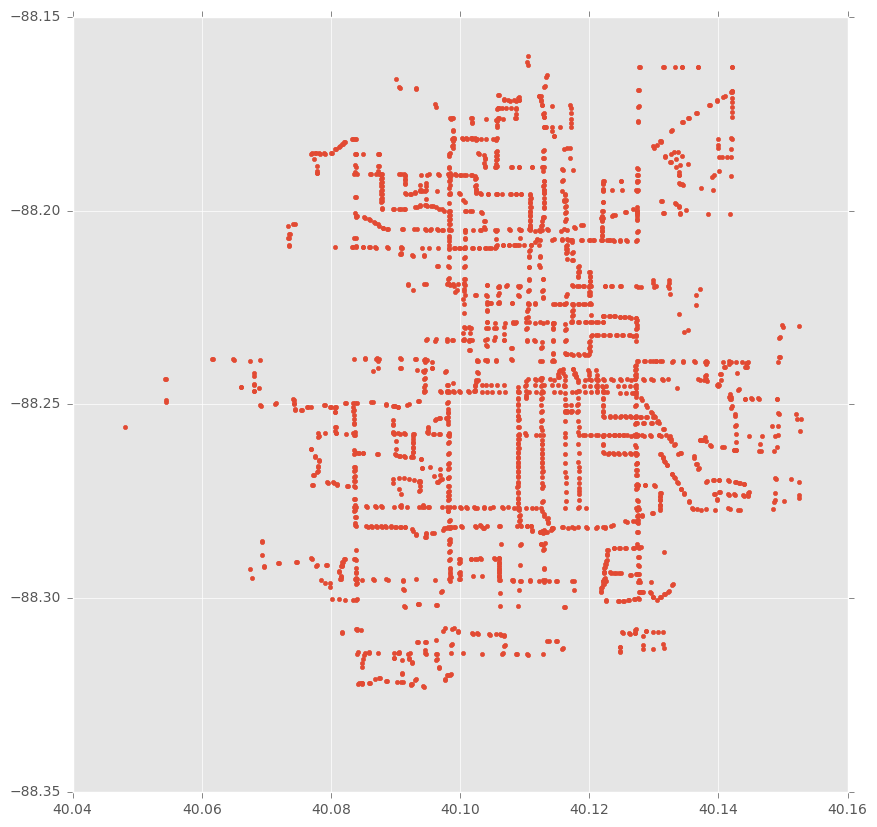

In [16]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(data["stops"]["stop_lat"],data["stops"]["stop_lon"],".")
plt.show()

## Plot in Google map (Both scatter plot and heatmap)
    The plot will be in the "scatter.html" and "heatmap.html"
    ???Shall we show the pic here? (Maybe use some technique that could capture screenshot from web?)

In [57]:
import gmplot
gmap = gmplot.GoogleMapPlotter(40.088, -88.281, 16)
gmap.heatmap(data["stops"]["stop_lat"], data["stops"]["stop_lon"])
gmap.draw("heatmap.html")

In [59]:
import gmplot
gmap = gmplot.GoogleMapPlotter(40.088, -88.281, 16)
gmap.scatter(data["stops"]["stop_lat"], data["stops"]["stop_lon"],'ee6481', size=40, marker=False)
gmap.draw("scatter.html")

## Density plot

/Users/beibri/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


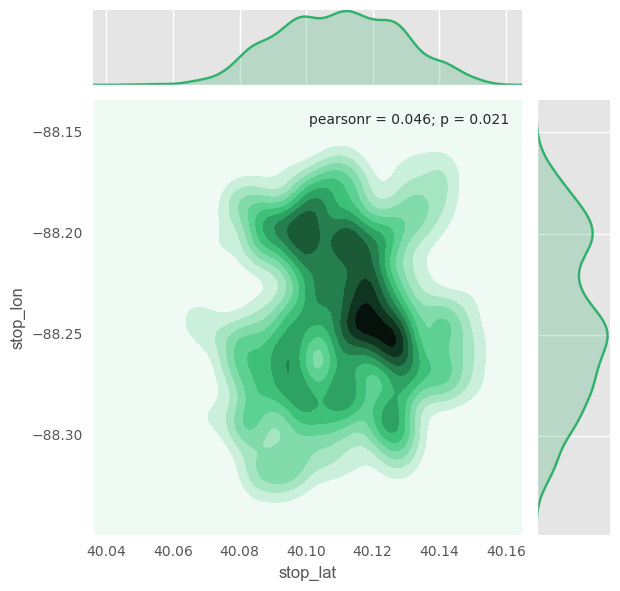

In [68]:
import seaborn as sns
stops=data["stops"]
ax=sns.jointplot(x="stop_lat",y='stop_lon',data=stops,kind="kde", color="#32b16c")

# 2. Choose top 10 stops that is busiest (in most trips)

In [5]:
from collections import Counter
stopid=data["stop_times"]["stop_id"]
word_counts = dict(Counter(stopid))
top_ten=dict(Counter(word_counts).most_common(10))
top_ten_keys=top_ten.keys()

In [6]:
top_ten_keys

dict_keys(['GRNMAT:3', 'ARYWRT:3', 'LSE:8', 'PLAZA:4', 'IU:2', 'PAR:2', 'IU:1', 'IT:5', 'GRNMAT:1', 'WRTCHAL:4'])

In [7]:
top_ten_sorted = sorted(top_ten.items(), key=lambda x: x[1],reverse=True)
print (top_ten_sorted)

[('PAR:2', 1732), ('IU:1', 1674), ('GRNMAT:3', 1660), ('IU:2', 1629), ('GRNMAT:1', 1617), ('ARYWRT:3', 1451), ('IT:5', 1317), ('PLAZA:4', 1292), ('LSE:8', 1286), ('WRTCHAL:4', 1247)]


In [50]:
stops=data["stops"]
top10data=stops.loc[stops['stop_id'].isin(top_ten_keys)]

In [8]:
def sort_list(top_ten_sorted):
    sortlist=[]
    for t in top_ten_sorted:
        t0=t[0]
        sortlist.append(t0)
    return sortlist

In [9]:
sortlist=sort_list(top_ten_sorted)

In [10]:
def get_stop_name(stop):
    match = data['stops']['stop_id'] == stop
    stop_name = data['stops'][match]['stop_name'].values[0]
    return stop_name

In [11]:
stoplist=[]
def stop_name_list(top_ten_keys):
    for i in top_ten_keys:
        selected=get_stop_name(i)
        stoplist.append(selected)
    return stoplist

In [12]:
sortname=stop_name_list(sortlist)
print (sortname)

['PAR (North Side Shelter)', 'Illini Union (South Side Shelter)', 'Green & Mathews (SW Corner)', 'Illini Union (Engineering Side)', 'Green & Mathews (NE Corner)', 'Armory & Wright (South Side)', 'Illinois Terminal (Platform C)', 'Transit Plaza (SE Platform)', 'Lincoln Square Garage South', 'Wright & Chalmers (NW Corner)']


## Bar Plot

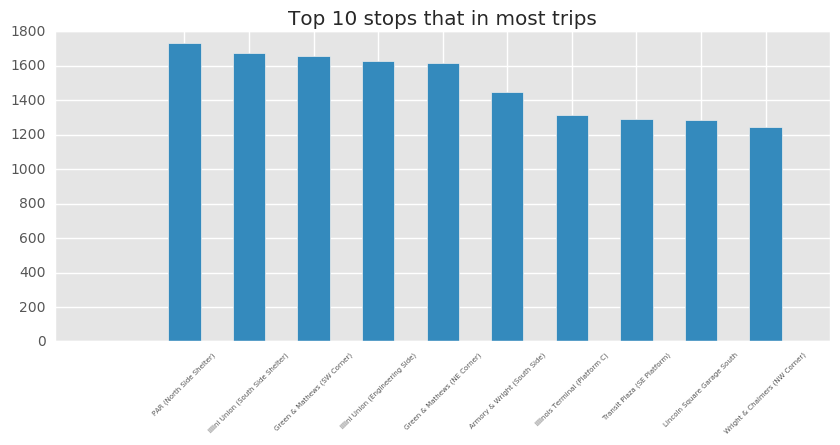

In [55]:
plt.rcParams["figure.figsize"] = (10, 4)
plt.style.use("ggplot")
plt.bar(range(len(top_ten)), [t[1] for t in top_ten_sorted], align='center',width=0.5)
plt.xticks(range(len(top_ten)), sortname,fontsize=5,rotation='45')
plt.title("Top 10 stops that in most trips")

## Shows the top 10 popular stops in the scatterplot

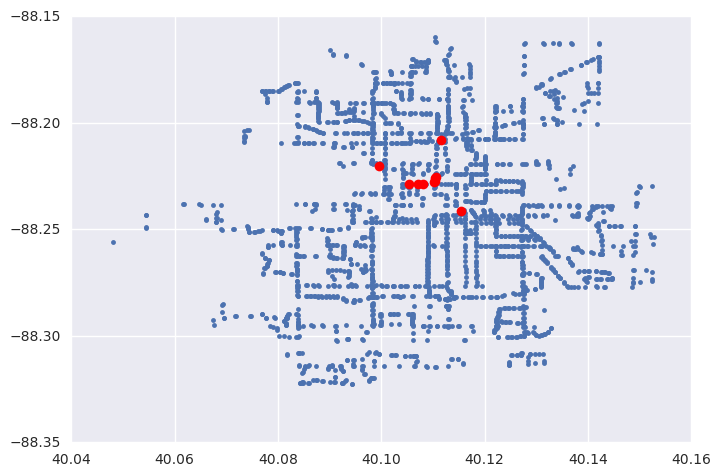

In [54]:
fig=plt.figure()
ax1=fig.add_subplot(111)

ax1.plot(data["stops"]["stop_lat"],data["stops"]["stop_lon"],".")
ax1.plot(top10data["stop_lat"],top10data["stop_lon"],"ro")